<a href="https://colab.research.google.com/github/ithalo-teodosio/pratica_ML/blob/main/ML_Q3_Hackaton_Cliente_E_commerce_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instituição: Unifacisa
# Autor: Ithalo Teodósio Nascimento - Data 21 de Abril
# Q3 - Agrupamento de clientes de e-commerce

**Questão 3 (fácil) - Agrupamento de Clientes de um E-commerce**

Imagine que você trabalha para um e-commerce e deseja segmentar os clientes em diferentes grupos de comportamento com base em dados de compras.

Tarefas:

- Utilize um dataset que contenha informações como quantidade de compras, valor gasto, frequência de compra.
- Aplique o algoritmo K-Means para segmentação dos clientes.
- Utilize o método do cotovelo (Elbow Method) para definir o melhor número de clusters.
- Visualize os grupos de clientes em um gráfico de dispersão.

Pergunta: Quantos clusters você definiu como ideal e quais foram os principais padrões encontrados em cada grupo?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

num_clients = 1000 # Definindo o número de clientes
np.random.seed(42) # Gerando dados simulados
quantidade_compras = np.random.randint(1, 51, num_clients) # Número de compras por cliente (aleatório entre 1 e 50)
valor_gasto = np.random.uniform(10, 2000, num_clients) # Valor gasto por cliente (aleatório entre R$10 e R$2000)
frequencia_compra = np.random.randint(1, 21, num_clients) # Frequência de compras por cliente (aleatório entre 1 e 20)

# Criando um DataFrame com os dados simulados
df = pd.DataFrame({
    "cliente_id": [f"cliente_{i+1}" for i in range(num_clients)],
    "quantidade_compras": quantidade_compras,
    "valor_gasto": valor_gasto,
    "frequencia_compra": frequencia_compra
})

# Exibindo as primeiras linhas do DataFrame
df.head()

# Salvando o DataFrame em um arquivo CSV
df.to_csv("ecommerce_data.csv", index=False)

print("Base de dados 'ecommerce_data.csv' gerada com sucesso!")

Base de dados 'ecommerce_data.csv' gerada com sucesso!


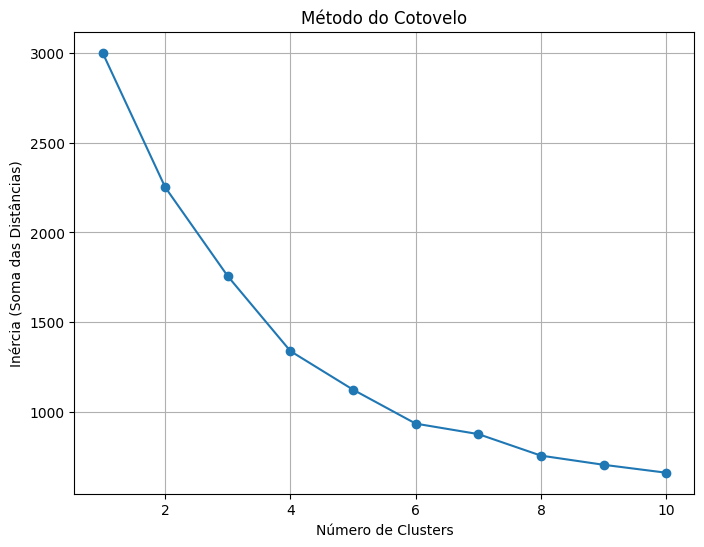

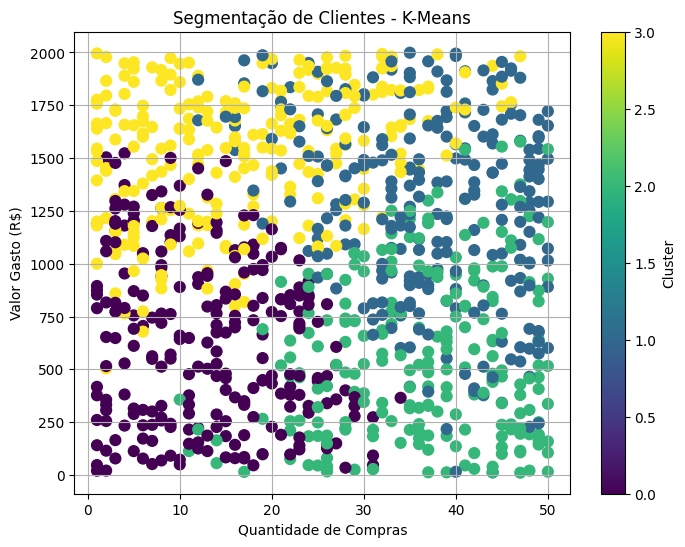

In [6]:
# Carregando os dados do CSV salvo anteriormente
df = pd.read_csv("ecommerce_data.csv")

# Selecionando apenas as colunas numéricas para o agrupamento
df_clean = df[['quantidade_compras', 'valor_gasto', 'frequencia_compra']].dropna()

# Normalizando os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_clean)

# Método elbow para encontrar o número ideal de clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia (Soma das Distâncias)')
plt.grid(True)
plt.show()

# Aplicando o K-Means com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(data_scaled)

# Visualizando os clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['quantidade_compras'], df_clean['valor_gasto'],
            c=df_clean['cluster'], cmap='viridis', s=60)
plt.title('Segmentação de Clientes - K-Means')
plt.xlabel('Quantidade de Compras')
plt.ylabel('Valor Gasto (R$)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
# Foram definidos 4 clusters como ideal;
# Cluster 1: Baixo gasto e baixa frequência;
# Cluster 2: Alto gasto e baixa frequência;
# Cluster 3: Baixo gasto e alta frequência;
# Cluster 4: Alto gasto e alta frequência.